# Breast cancer analysis

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
#sns.set_theme(style="dark")

In [2]:
df = pd.read_csv("breast-cancer.csv",na_values="?")

In [3]:
df.shape

(699, 11)

In [4]:
df.columns

Index(['ID', 'clump_thickness', 'uniformity_cell_size',
       'uniformity_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [5]:
df.isna().sum()

ID                              0
clump_thickness                 0
uniformity_cell_size            0
uniformity_cell_shape           0
marginal_adhesion               0
single_epithelial_cell_size     0
bare_nuclei                    16
bland_chromatin                 0
normal_nucleoli                 0
mitoses                         0
class                           0
dtype: int64

In [6]:
df.dtypes

ID                               int64
clump_thickness                  int64
uniformity_cell_size             int64
uniformity_cell_shape            int64
marginal_adhesion                int64
single_epithelial_cell_size      int64
bare_nuclei                    float64
bland_chromatin                  int64
normal_nucleoli                  int64
mitoses                          int64
class                            int64
dtype: object

In [7]:
df.head()

,ID,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [8]:
df.drop(columns="ID",inplace=True)
df.describe()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


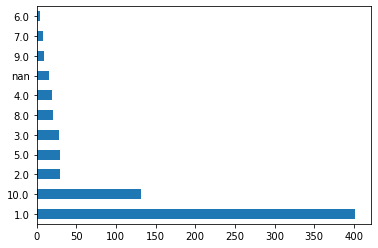

In [9]:
df.bare_nuclei.value_counts(dropna=False).plot.barh()
plt.show()

In [10]:
df.bare_nuclei.fillna(df.bare_nuclei.mode().iloc[0],inplace=True)

In [11]:
df.bare_nuclei.value_counts(dropna=False)

1.0     418
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: bare_nuclei, dtype: int64

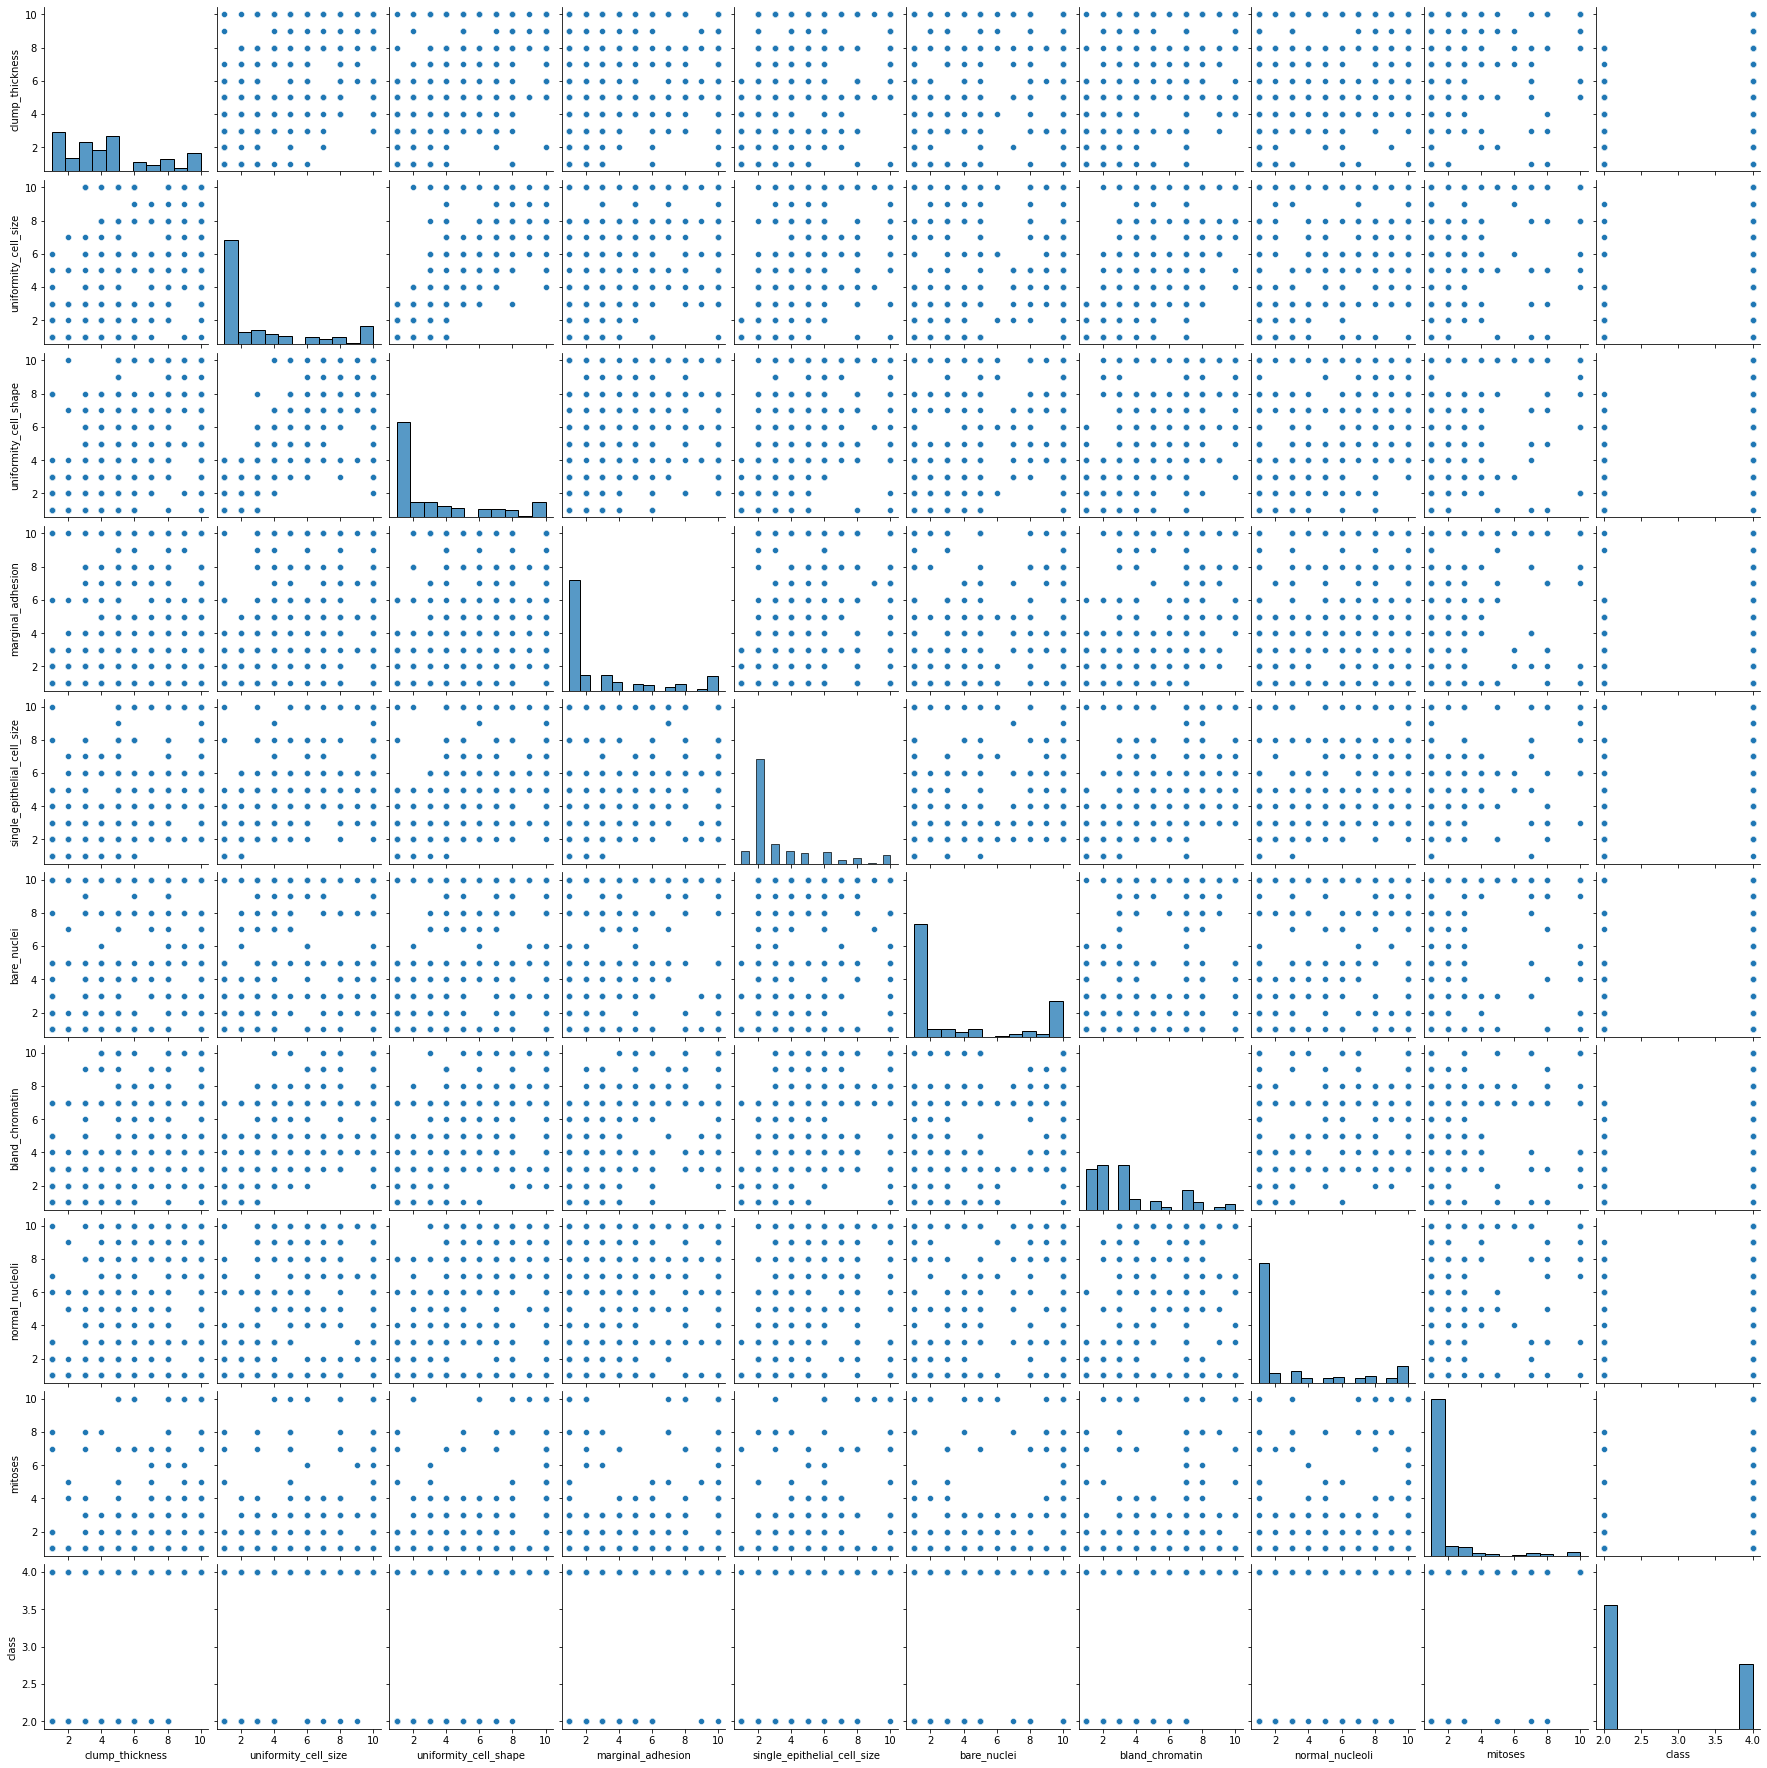

In [12]:
sns.pairplot(df)
plt.show()

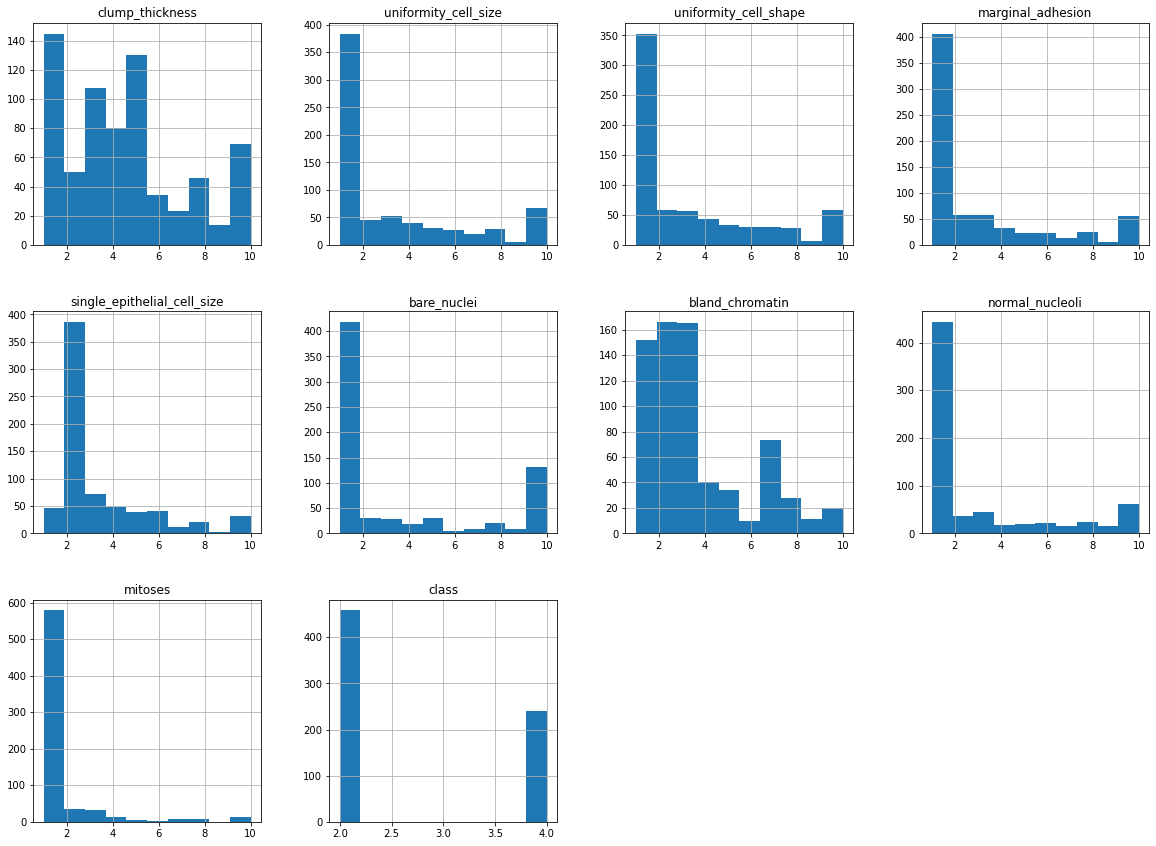

In [13]:
df.hist(layout=(4,4),figsize=(20,20))
plt.show()

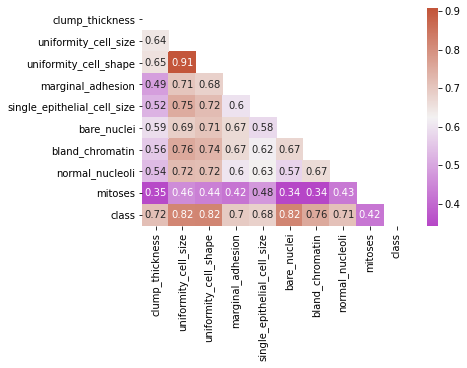

In [14]:
corr =df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(300, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
#sns.heatmap(df.drop(columns="ID").corr(), cmap = "Greens", annot=True)
plt.show()

In [15]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat["variables"]=corr_mat['variable_1'].astype(str)+ corr_mat["variable_2"]
    corr_mat.drop(columns=["variable_1","variable_2"],inplace=True)
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=True)
    return(corr_mat)

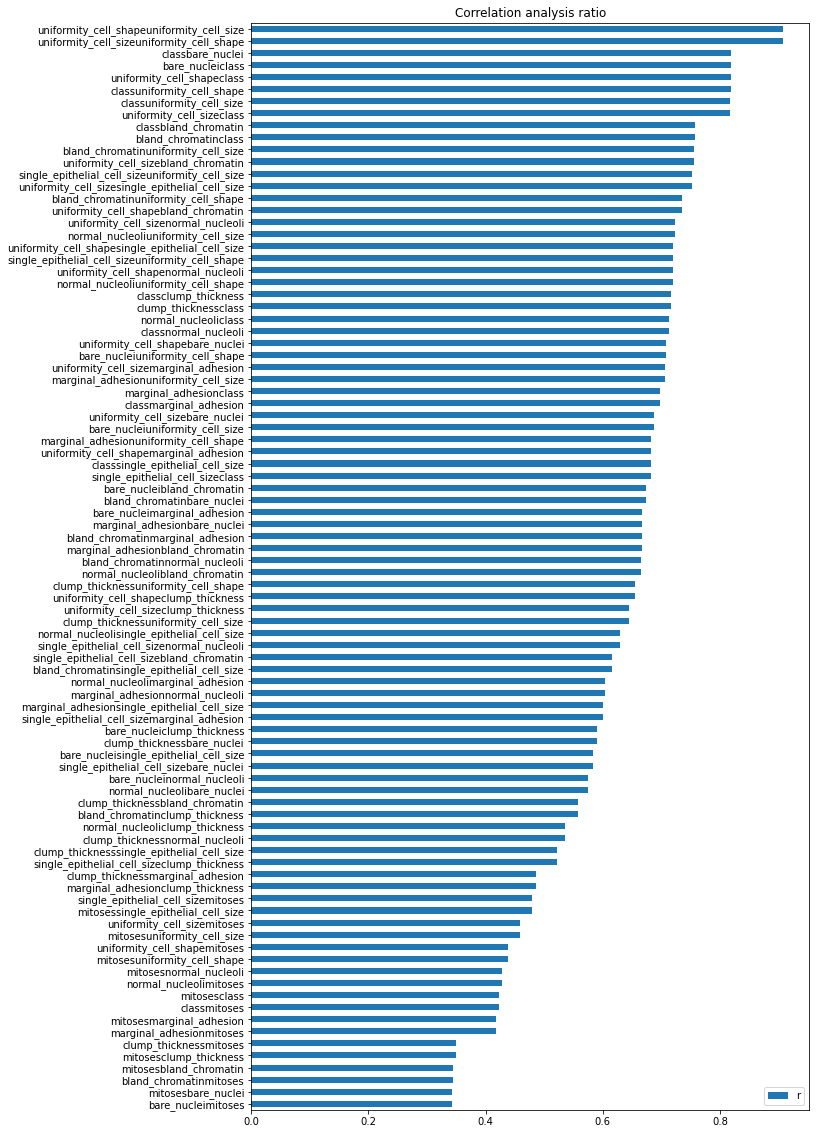

In [16]:
tidy_corr_matrix(df.corr()).plot.barh(x="variables",y="r",figsize=(10,20))
plt.title("Correlation analysis ratio")
plt.ylabel("")
plt.show()

Class:<br>
2: for benign<br>
4: for malignant

In [17]:
#Class
n_classes=df["class"].value_counts(dropna=False)

In [18]:
n_classes

2    458
4    241
Name: class, dtype: int64

La idea es duplicar los datos respecto a los casos malignos hasta llegar a la proporción de 40/60 por ser conservativo respecto a los falsos negativos. 

In [19]:
round(df.shape[0]*0.40,0)

280.0

In [20]:
from sklearn.utils import resample
classes_4_balanced = resample(df[df["class"]==4], n_samples=(int(round(n_classes.iloc[0]*2/3,0))-n_classes.iloc[1]),random_state=141)

In [21]:
classes_4_balanced

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
264,7,9,4,10,10,3.0,5,3,3,4
106,10,10,10,8,2,10.0,4,1,1,4
56,8,10,10,1,3,6.0,3,9,1,4
233,10,4,5,5,5,10.0,4,1,1,4
155,5,5,5,6,3,10.0,3,1,1,4
...,...,...,...,...,...,...,...,...,...,...
698,4,8,8,5,4,5.0,10,4,1,4
128,8,3,5,4,5,10.0,1,6,2,4
329,10,4,6,4,5,10.0,7,1,1,4
270,8,4,7,1,3,10.0,3,9,2,4


In [22]:
df_balanced = pd.concat([df,classes_4_balanced])

In [23]:
df_balanced

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
698,4,8,8,5,4,5.0,10,4,1,4
128,8,3,5,4,5,10.0,1,6,2,4
329,10,4,6,4,5,10.0,7,1,1,4
270,8,4,7,1,3,10.0,3,9,2,4


In [24]:
from sklearn.model_selection import train_test_split,cross_validate
data_train , data_test = train_test_split(df,test_size=0.2,random_state=141) 

In [25]:
train_x=data_train.drop(columns="class")
train_y=data_train["class"]

In [26]:
test_x=data_test.drop(columns="class")
test_y=data_test["class"]

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold
main_kfold = KFold(10, shuffle=True, random_state=45)

## KNN

In [28]:
%%time
n_neighbors= range(1,26)
from sklearn.neighbors import KNeighborsClassifier

#create a knn model
knn = KNeighborsClassifier(p=1)#singular parameters
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.array(n_neighbors)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=main_kfold, scoring="accuracy",n_jobs=-1)
#fit model to data
knn_gscv.fit(train_x, train_y)

Wall time: 1.85 s


GridSearchCV(cv=KFold(n_splits=10, random_state=45, shuffle=True),
             estimator=KNeighborsClassifier(p=1), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])},
             scoring='accuracy')

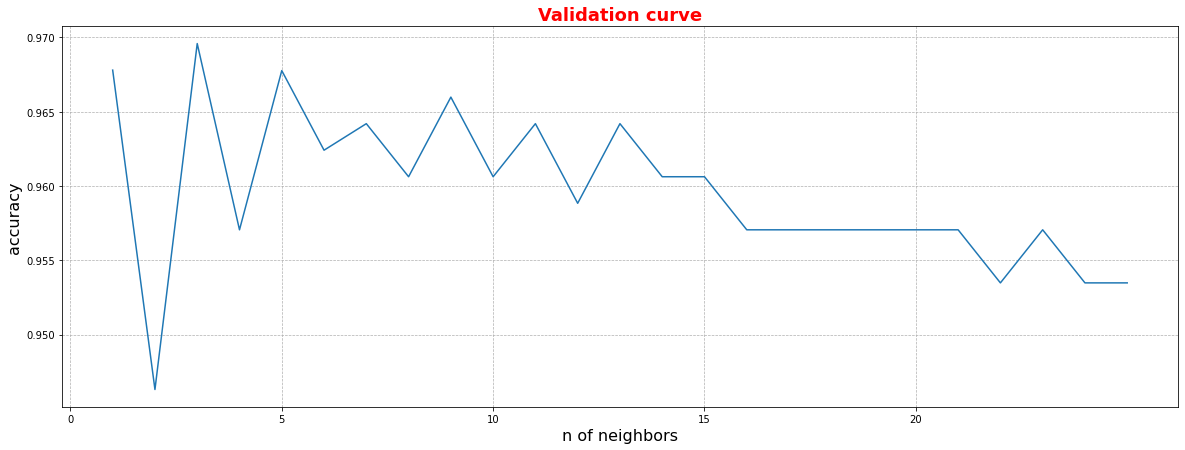

In [29]:
plt.figure(figsize=(20,7))
plt.plot(n_neighbors, knn_gscv.cv_results_['mean_test_score']) 
plt.title('Validation curve',fontsize=18,color='red',fontweight="bold")
plt.xlabel('n of neighbors',fontsize=16)
plt.xticks(np.arange(0,25,step=5))
plt.ylabel('accuracy',fontsize=16)
plt.grid(ls='--',lw=0.7) 
plt.show()    

In [30]:
predict_y=knn_gscv.predict(test_x)
accuracy_score(predict_y,test_y)

0.9714285714285714

In [31]:
confusion_matrix(y_true=test_y,y_pred=predict_y)

array([[89,  2],
       [ 2, 47]], dtype=int64)

## Random Forest

In [32]:
%%time
N=np.array([25,50,75,100,300])
from sklearn.ensemble import RandomForestClassifier 

#create a rf model
rf = RandomForestClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_estimators": N}
#param_grid = [{"n_estimators": N,
    #'max_depth': [5, 20, None],
    #'min_samples_split': [2, 10, 50],
    #'min_samples_leaf': [1, 10, 50],
    #'max_leaf_nodes': [10, 50, None],
    #'max_features': ['sqrt', 'log2', None]}]

#use gridsearch to test all values for n_neighbors
rf_gscv = GridSearchCV(rf, param_grid, cv=main_kfold,scoring='accuracy',n_jobs=-1)
#fit model to data
rf_gscv.fit(train_x, train_y)

Wall time: 1.24 s


GridSearchCV(cv=KFold(n_splits=10, random_state=45, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': array([ 25,  50,  75, 100, 300])},
             scoring='accuracy')

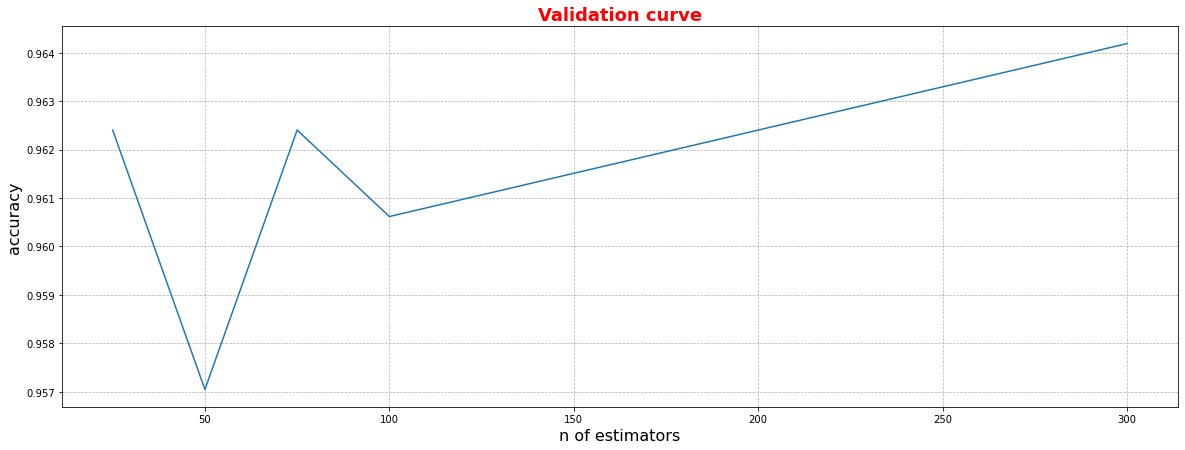

In [33]:
plt.figure(figsize=(20,7))
plt.plot(N, rf_gscv.cv_results_['mean_test_score']) 
plt.title('Validation curve',fontsize=18,color='red',fontweight="bold")
plt.xlabel('n of estimators',fontsize=16)
#plt.xticks(np.arange(0,25,step=5))
plt.ylabel('accuracy',fontsize=16)
plt.grid(ls='--',lw=0.7) 
plt.show()    

In [34]:
predict_y=rf_gscv.predict(test_x)
accuracy_score(predict_y,test_y)

0.9714285714285714

In [35]:
confusion_matrix(y_true=test_y,y_pred=predict_y)

array([[89,  2],
       [ 2, 47]], dtype=int64)

## Neural Network

In [36]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

In [37]:
def create_model(n_neurons):
    model=Sequential()
    model.add(Input(train_x.shape[1]))
    model.add(Dense(n_neurons, activation='relu')) 
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.01),# gradient descent method
                  loss='sparse_categorical_crossentropy',# metric on neuron 
                  metrics=['accuracy'])# metric on output
    return(model) 

In [38]:
#Transforming 2 to 0 and 4 to 1
train_y.replace({2:0, 4:1},inplace=True)
test_y.replace({2:0, 4:1},inplace=True)

In [39]:
from scikeras.wrappers import KerasClassifier

In [40]:
model = KerasClassifier(model=create_model, verbose=0)

In [ ]:
%%time
N=np.arange(5,105,step=5)
param_grid=dict(model__n_neurons=N)
nn_gscv = GridSearchCV(model, param_grid, cv=main_kfold,scoring='accuracy',n_jobs=-1)
#fit model to data
nn_gscv.fit(train_x,train_y,epochs=70, batch_size=10,verbose=0)

C:\Users\juand\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
plt.figure(figsize=(20,7))
plt.plot(N, nn_gscv.cv_results_['mean_test_score']) 
plt.title('Validation curve',fontsize=18,color='red',fontweight="bold")
plt.xlabel('n of neurons',fontsize=16)
plt.xticks(N)
plt.ylabel('accuracy',fontsize=16)
plt.grid(ls='--',lw=0.7) 
plt.show()    

In [ ]:
predict_y=nn_gscv.predict(test_x)
accuracy_score(predict_y,test_y)

In [ ]:
confusion_matrix(y_true=test_y,y_pred=predict_y)